In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def plot_char_frequency(string: str) -> None:
    char_count = Counter(string)
    chars = list(char_count.keys())
    frequencies = list(char_count.values())
    total_chars = len(string)
    percentages = [count / total_chars * 100 for count in frequencies]
    plt.figure(figsize=(12, 6))
    bars = plt.bar(chars, percentages)
    plt.xlabel('Chars')
    plt.ylabel('Percentage')
    plt.title('Character Percentage in Text')
    for bar, percent in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percent:.2f}%', ha='center')
    plt.show()


def find_key_length(ciphertext, max_key_length=20):
    try:
        ciphertext = ciphertext.upper()
        ic_values = []
        for key_length in range(1, max_key_length + 1):
            blocks = [ciphertext[i::key_length] for i in range(key_length)]
            ic = []
            for block in blocks:
                block_len = len(block)
                if block_len <= 1:
                    continue
                freq_counter = Counter(block)
                ic.append(sum(n * (n - 1) / (block_len * (block_len - 1)) for n in freq_counter.values()))
            if ic:
                ic_values.append(np.mean(ic))
            else:
                ic_values.append(0)
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, max_key_length + 1), ic_values, marker='o', linestyle='-')
        plt.xlabel('Key_lenght')
        plt.ylabel('IC')
        plt.title('Kasisik\'s method (key length): ')
        plt.grid(True)
        plt.show()
        best_guess_key_length = np.argmax(ic_values) + 1
        return best_guess_key_length
    except Exception as e:
        print("Error", str(e))
        return None


In [8]:
cipher_text = "and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum"


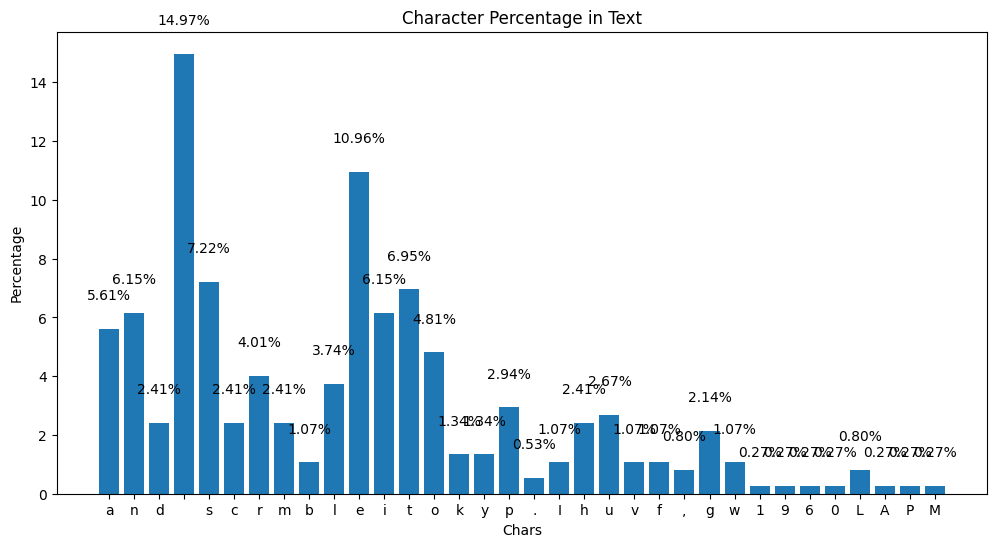

In [9]:
plot_char_frequency(cipher_text)


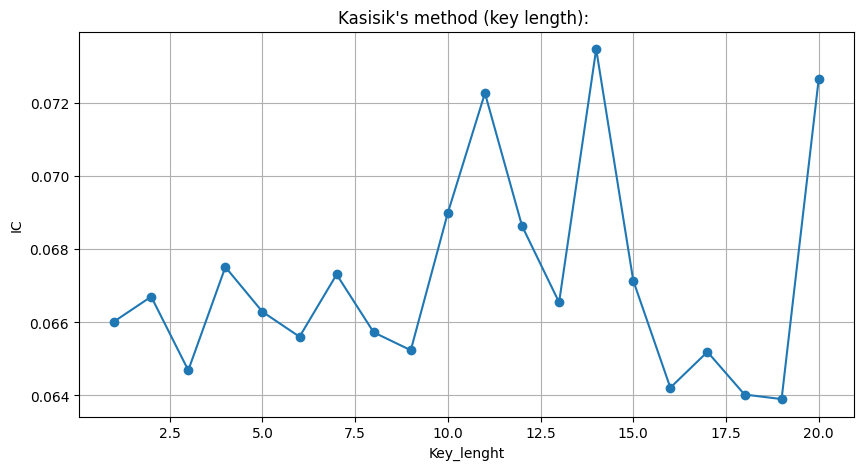

Key_length: 14


In [10]:
key_length = find_key_length(cipher_text)
if key_length is not None:
    print("Key_length:", key_length)
